# Hierarchial Clustering of 2016 Election Data 

In [1]:
#importing external modules 
import numpy as np

#import text file and split on the states names and percentages 
states = [x.split(' ')[0] for x in open('states.txt').readlines()]
X = np.array([x.split()[1:] for x in open('states.txt').readlines()])

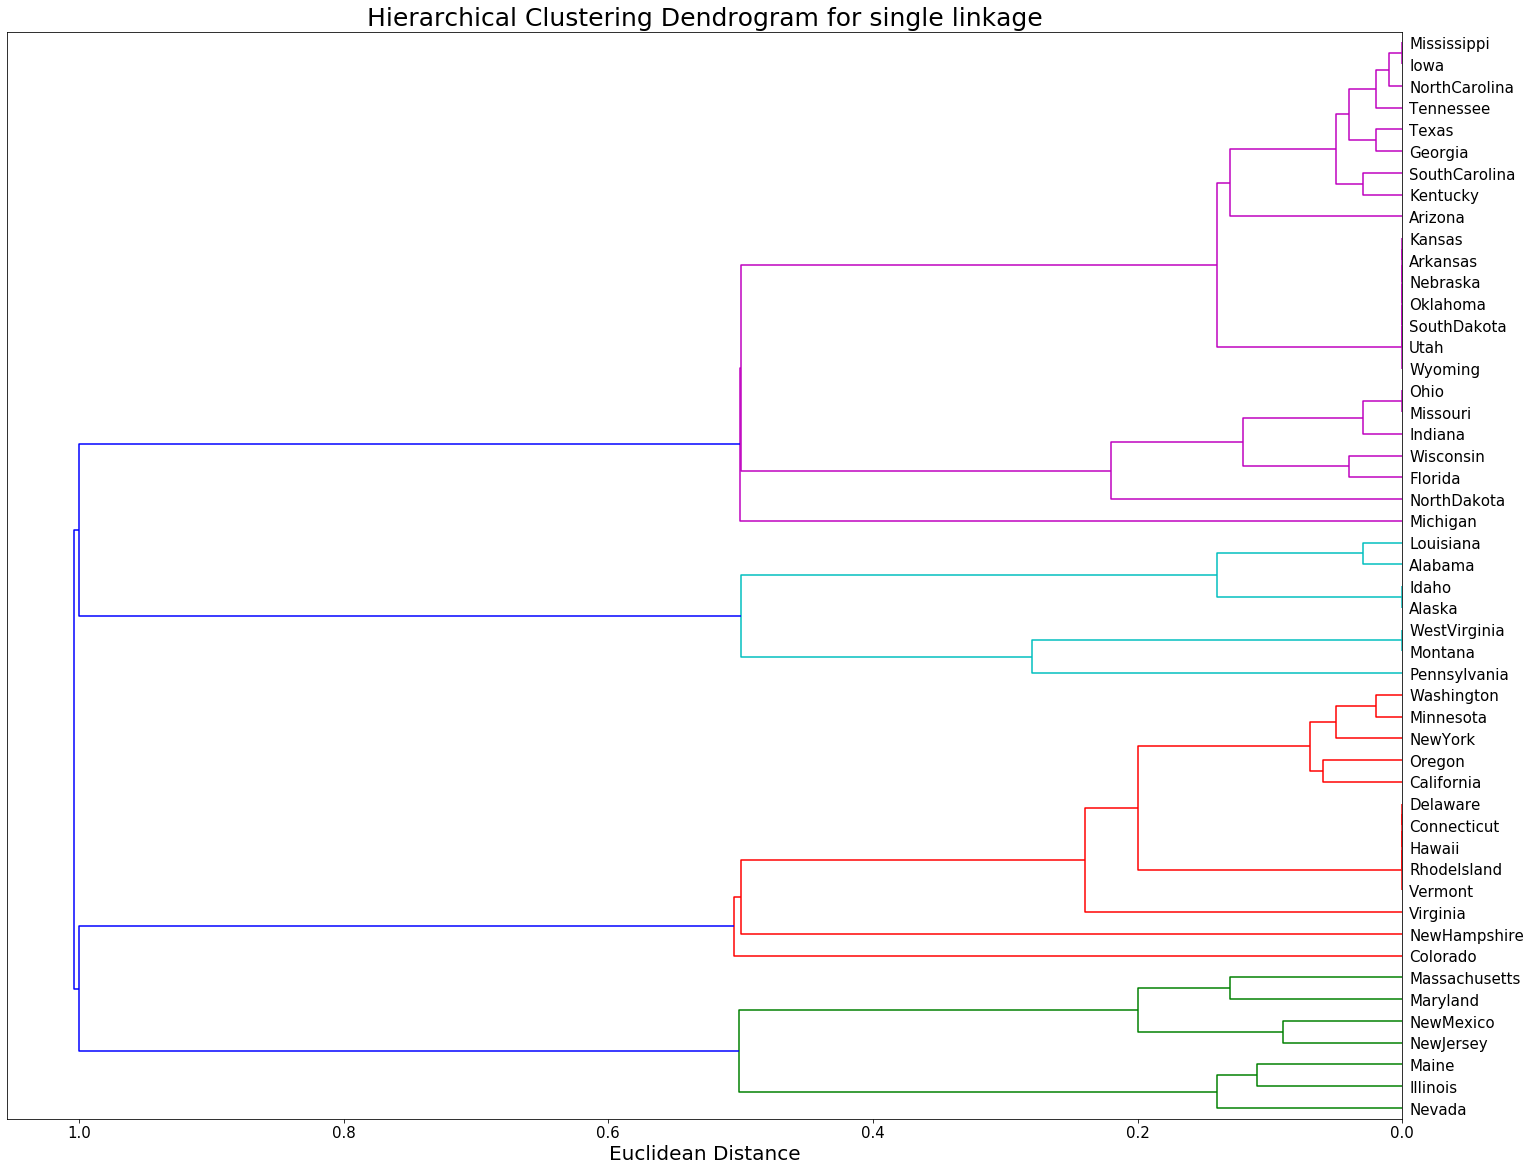

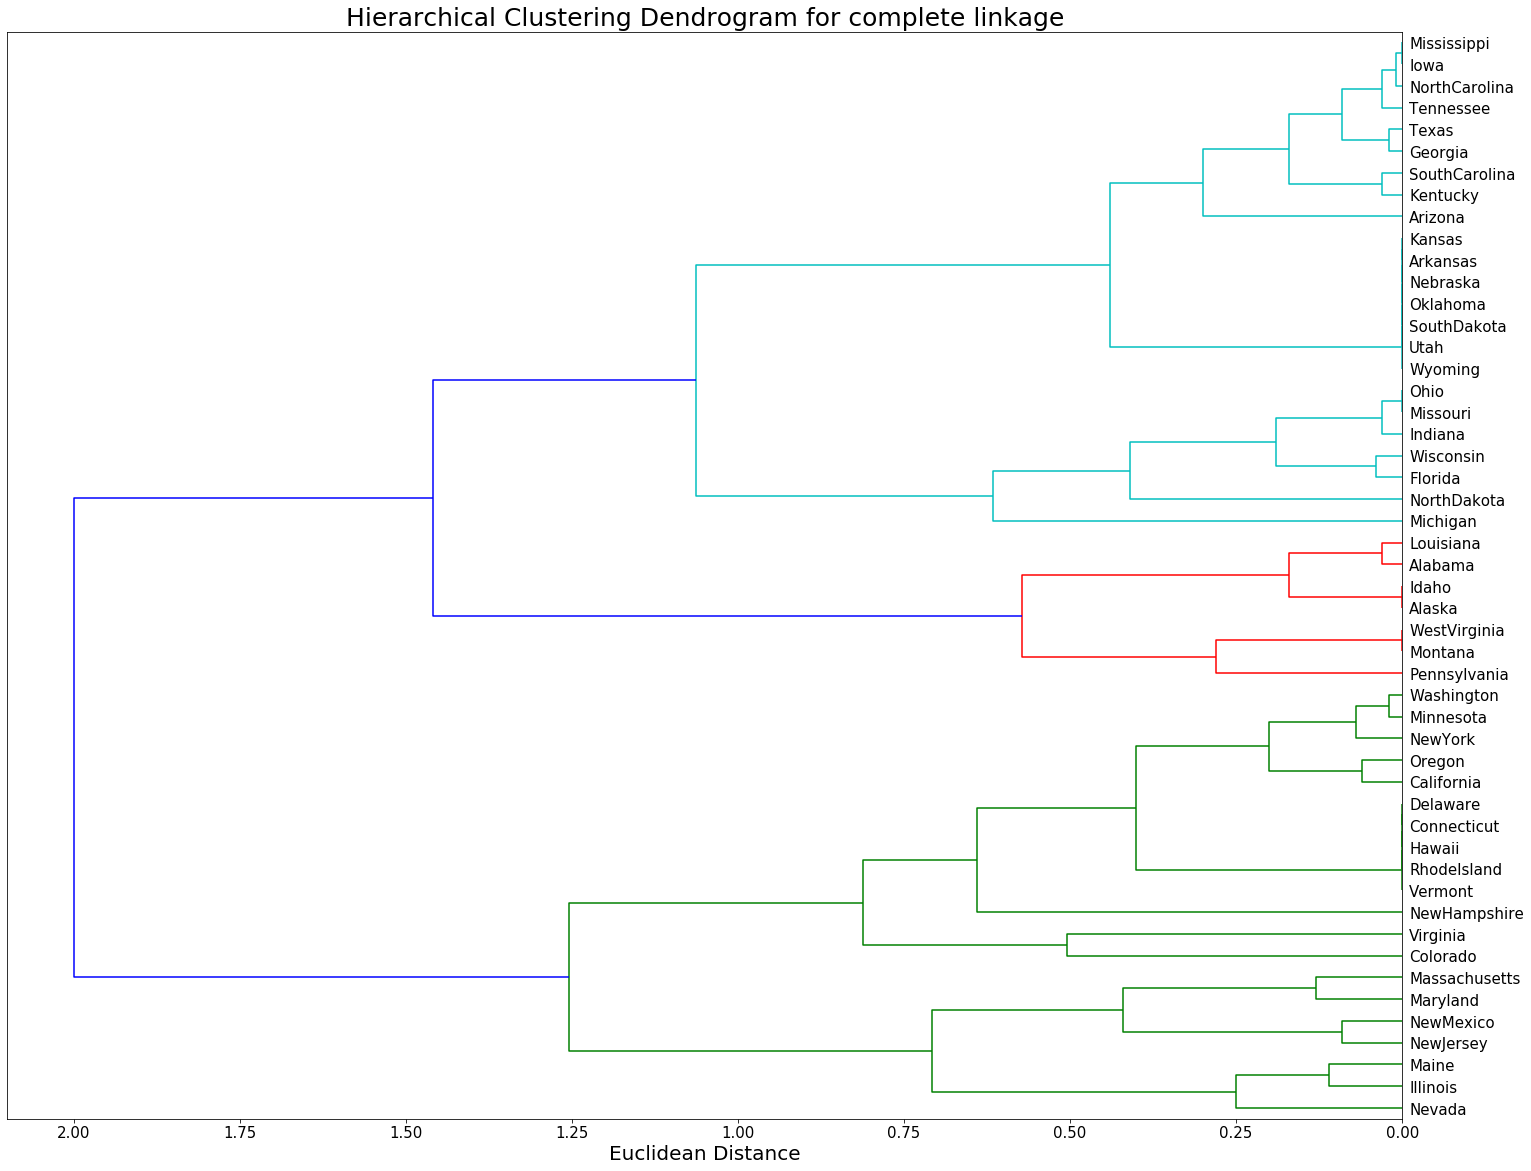

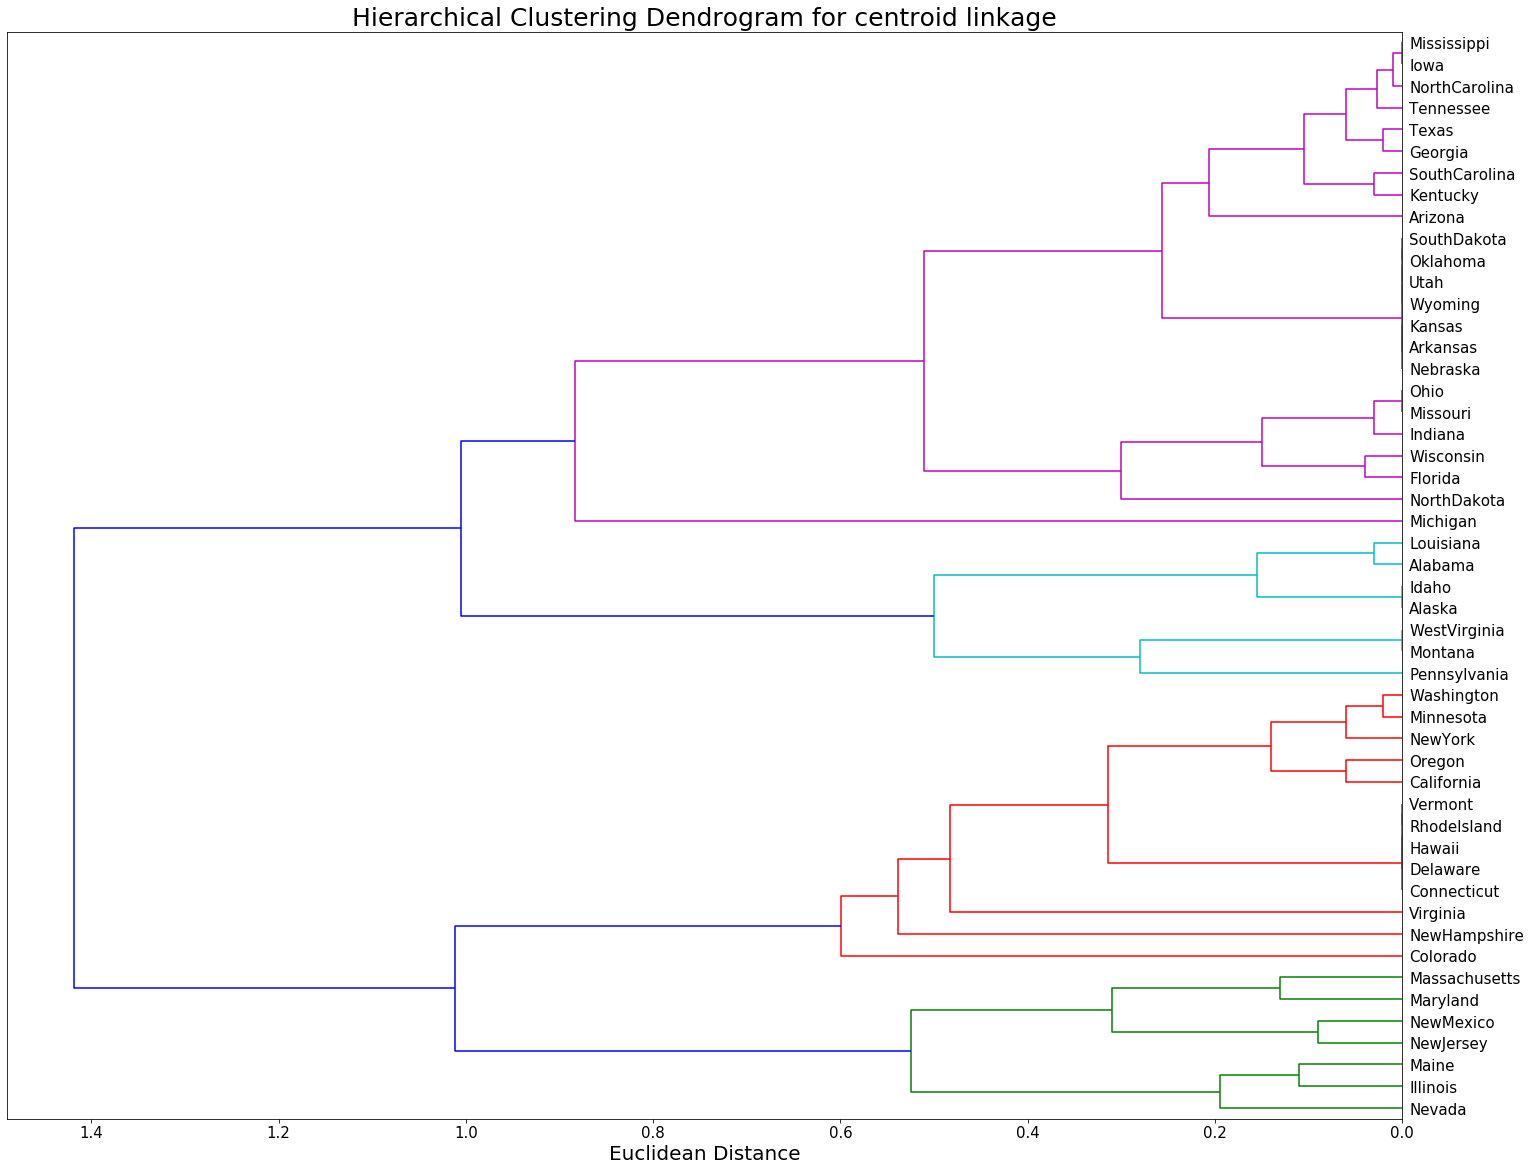

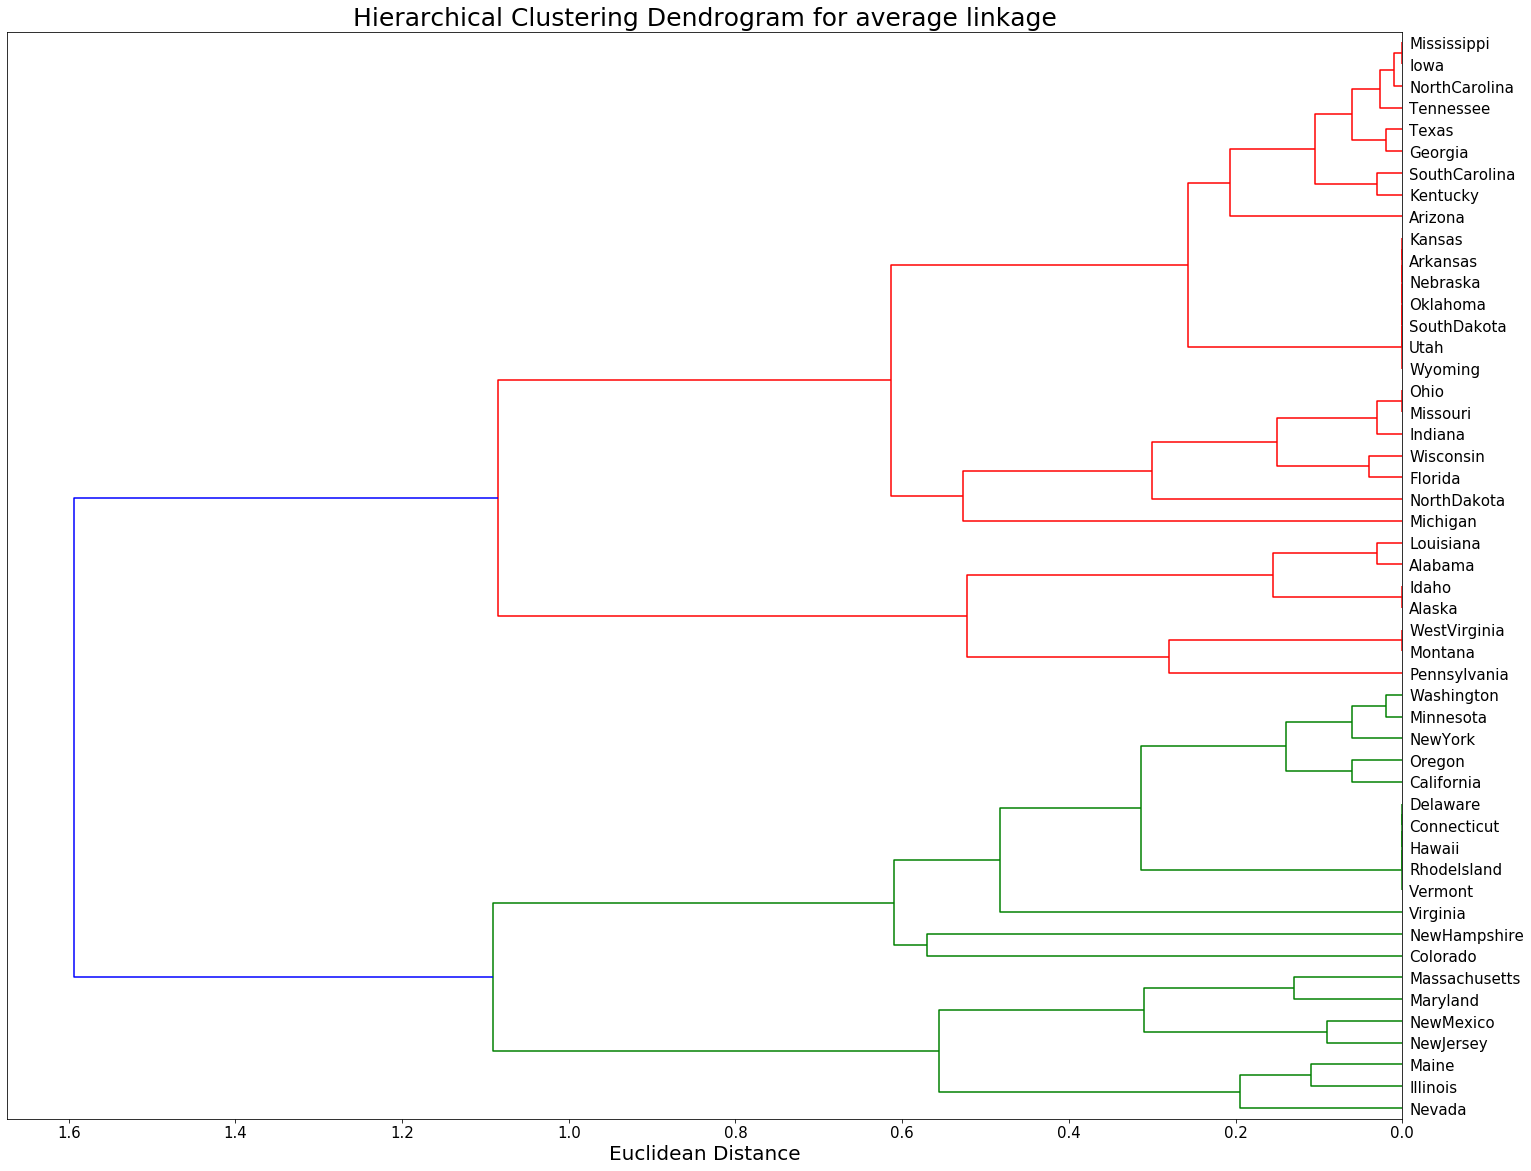

In [2]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
%matplotlib inline

#create list of linked methods 
lst = ['single', 'complete', 'centroid', 'average']

#iterate through each element in linked methods list
for i in lst:
    #create figure canvas 
    plt.figure(figsize=(25,20))
    #include title and xlabel 
    plt.title('Hierarchical Clustering Dendrogram for '+i+' linkage', fontsize=25)
    plt.xlabel('Euclidean Distance', fontsize=20)
    plt.tick_params(axis='x', labelsize=15)
    #plot dendrogram for each linkage method, statenames on the y axis
    #increasing cluster sizes go from right to left 
    dend = shc.dendrogram(shc.linkage(X, method=i, metric='euclidean'),
                          orientation='left',
                          count_sort='descendent',
                          leaf_rotation=360,
                          leaf_font_size=15,
                          labels=states)

## Conclusions

# Image Compression With K-Means

In [3]:
#import external image library 
from PIL import Image 

def readImage(filename):
    
    #convert image to np array 
    img = np.array(Image.open(filename))
    
    #show image 
    plt.imshow(img)
    
    #reshape image to 2d matrix
    img_arr = np.reshape(img, (img.shape[0], img.shape[1], img.shape[2]))   
    
    return img_arr

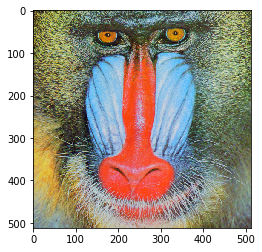

In [4]:
img = readImage('mandrill.png')

In [5]:
img

array([[[164, 150,  71],
        [ 63,  57,  31],
        [ 75,  43,  10],
        ...,
        [117, 119,  68],
        [141, 170, 101],
        [179, 188, 118]],

       [[120, 125,  62],
        [135,  97,  33],
        [ 55,  35,  23],
        ...,
        [122, 140,  98],
        [136, 159, 128],
        [120, 138,  74]],

       [[ 99,  74,  31],
        [132, 118,  46],
        [ 60,  41,  36],
        ...,
        [118,  93,  90],
        [ 87,  91,  77],
        [ 96,  80,  49]],

       ...,

       [[121, 148, 155],
        [123, 156, 150],
        [124, 150, 139],
        ...,
        [110,  73,  60],
        [ 90,  93,  70],
        [ 81,  80,  60]],

       [[126, 169, 168],
        [117, 151, 151],
        [121, 136, 133],
        ...,
        [ 73,  84,  68],
        [ 99,  69,  86],
        [ 80,  63,  71]],

       [[  9,  11,  12],
        [ 10,  12,  11],
        [ 11,  15,  12],
        ...,
        [  5,   8,   5],
        [  2,   5,   0],
        [  4,   5,   2]]

In [6]:
def clusterCentroids(data, k):
    
    centroids = []
    centroids.append(data[np.random.choice(np.arange(len(data)), k)])
   
    return np.array(centroids)

In [7]:
centroid = clusterCentroids(img, 2)

In [8]:
c_old = np.zeros(centroid.shape)
clusters = np.zeros(len(img))

In [9]:
def euclideanDistance(a, b):
    return np.linalg.norm(a-b)

In [10]:
error = euclideanDistance(centroid, c_old)
error

7861.550674008277

In [11]:
iterations = 10 

while iterations > 0:
    for i in range(len(img)):
        dist = euclideanDistance(img[i], centroid)
        cluster = np.argmin(dist)
        clusters[i] = cluster
    c_old = clusters
    iterations -= iterations 

In [ ]:
def kmeans(clusters, image_array):
    
    iterations = 10 
    n = len(image_array)
    
    while iterations > 0:
        
        for j in range(n):
            
            
        